In [1]:
from main import coord_check
from argparse import Namespace
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Failed to import apex. You can still train with --precision {float|double}.


In [2]:
import os
os.makedirs('coord_checks', exist_ok=True)

100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.39it/s]


coord check plot saved to coord_checks/sp_trsfmr_adam_coord.png


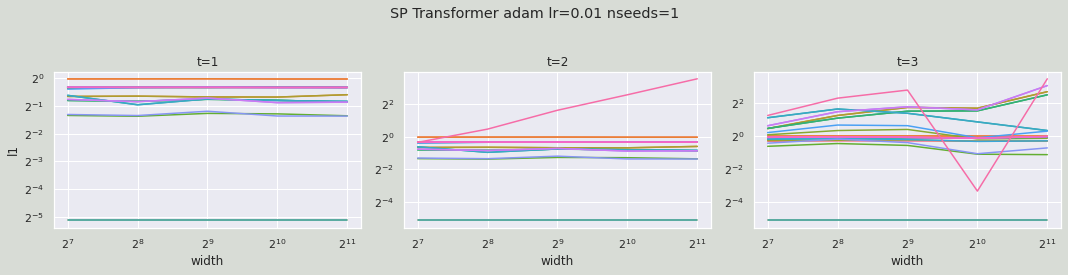

100%|█████████████████████████████████████████████| 7/7 [00:19<00:00,  2.73s/it]


coord check plot saved to coord_checks/sp_trsfmr_sgd_coord.png


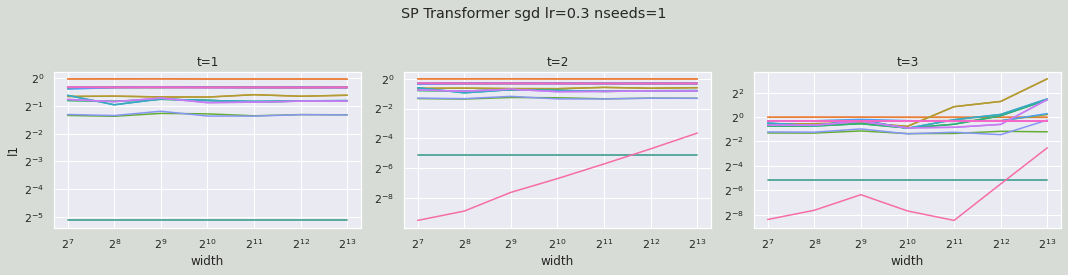

100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.39it/s]


coord check plot saved to coord_checks/μp_trsfmr_adam_coord.png


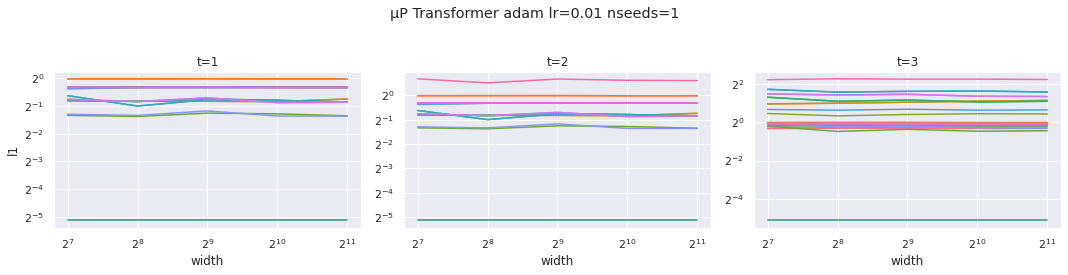

100%|█████████████████████████████████████████████| 7/7 [00:18<00:00,  2.71s/it]


coord check plot saved to coord_checks/μp_trsfmr_sgd_coord.png


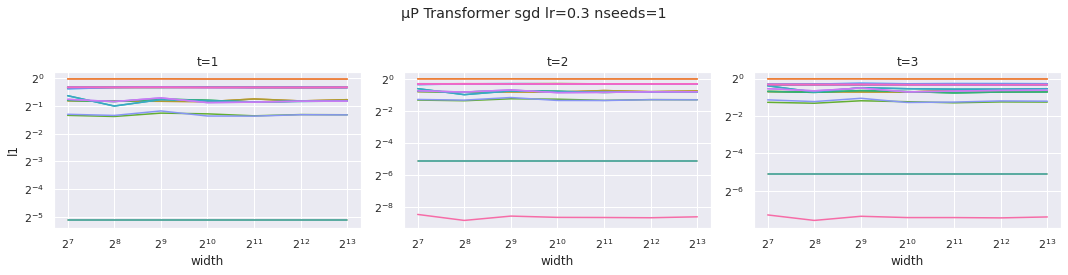

In [3]:
for mup, (lr, optimizer) in product([False, True], [(0.01, 'adam'), (0.3, 'sgd')]):
  args = Namespace(nhead=2, ffn_ratio=1, nlayers=2, dropout=0,
                   tied=False, bias=False, init_var=1, bptt=35,
                  load_base_shapes='width256.bsh', device='cuda',
                  attn_mult=1, output_mult=1, precision='half')
  coord_check(mup=mup,
              lr=lr, optimizer=optimizer, batch_size=32, nsteps=3,
              nseeds=1, data_dir='./data/wikitext-2', args=args,
              plotdir='coord_checks', legend=False)
  plt.show()